# Baseball number of wins prediction - Regression

# Problem Statement

We have been provided with data which acts as several different indicators of success for a baseball match.
We have 16 different features/inputs to analyze, and we need to predict the number of wins according to the given statistics.

We have received the below mentioned features in our problem statement as inputs -

- Runs
- At Bats
- Hits
- Doubles
- Triples
- Homeruns
- Walks
- Strikeouts
- Stolen Bases
- Runs Allowed
- Earned Runs
- Earned Run Average (ERA)
- Shutouts
- Saves
- Errors

We need to predict the output column -
- Wins


Since we need to predict a numerical output, we will be using Regression models in this problem.

In [226]:
#Importing the basic necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [227]:
#Loading data from csv file

bb_data = pd.read_csv('baseball.csv')

In [228]:
#Checking the data

bb_data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [229]:
bb_data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Observations by looking at the data -

- We have only 30 rows as the data input. We have very less data to train our model. The model is prone to overfitting due to less data availability.
- As per the problem statement, we have 15 inputs, but in our data set we have 16 inputs. CG column is extra in our dataset.
- The columns have been named as abberivations, we will rename the columns to make the data more readable.

In [230]:
#Renaming the columns to improve the readability of data while our analysis.

bb_data.rename(columns = {'W':'Wins','R':'Runs', 'AB':'At Bats','H': 'Hits','2B': 'Doubles','3B': 'Triples', 'HR':'Homeruns', 'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen Bases','RA': 'Runs Allowed', 'ER':'Earned Runs','ERA': 'Earned Run Average','SHO':'Shutouts','SV': 'Saves', 'E':'Errors'}, inplace = True)

In [231]:
bb_data

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Exploratory data analysis

We will now begin the exploratory data analysis of the shared data.

In [232]:
#Checking for null values

bb_data.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
CG                    0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

Observation - We see that our data does not contain any NaN value, which we would require to replace in the further process. But we need to confirm if there is any other variable which is being used to represent null values.

To ensure this we need to check the datatypes. If we see any data as object, this would mean that we have erronuous data. Our data should be either integer or floats.

In [233]:
bb_data.dtypes

Wins                    int64
Runs                    int64
At Bats                 int64
Hits                    int64
Doubles                 int64
Triples                 int64
Homeruns                int64
Walks                   int64
Strikeouts              int64
Stolen Bases            int64
Runs Allowed            int64
Earned Runs             int64
Earned Run Average    float64
CG                      int64
Shutouts                int64
Saves                   int64
Errors                  int64
dtype: object

From the above results, we were able to confirm the absence of any erronuous data in our dataset.

In [234]:
#Checking for data statistics

bb_data.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations by looking at data statistics -

- Majority of the data seems to have no significant outliers, and mean values tend to fall quite near to 50 percentile data in majority of the cases.
- Standard deviations in some columns are quite high, indicating widely spread data. 

Lets us now explore the data fields one by one, to get a hold of data on all the fields.

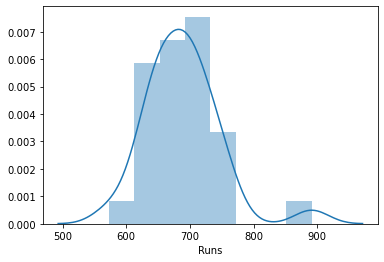

In [235]:
#Exploring the 'Runs' column

sns.distplot(bb_data['Runs'], axlabel = 'Runs')

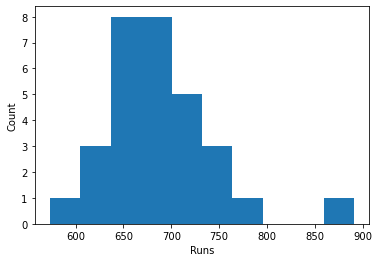

In [236]:
plt.hist(bb_data['Runs'])
plt.xlabel('Runs')
plt.ylabel('Count')
plt.show()

Observation - Majority of the data falls in the normal range but there is one value which is falling outside the range, and can be considered as an outlier.

This value is 891.

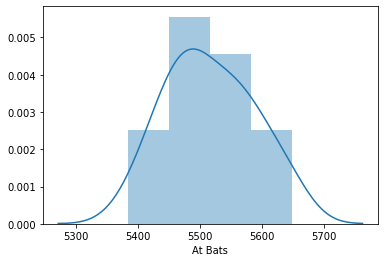

In [237]:
#Exploring the 'At Bats' variable

sns.distplot(bb_data['At Bats'])

Observation from the above distribution plot -

- The data is normally distributed and no outliers are present in this column.
- The spread of data more as the curve is not steep but has a greater width
- The values of 'At Bats' range between ~5380 - 5640

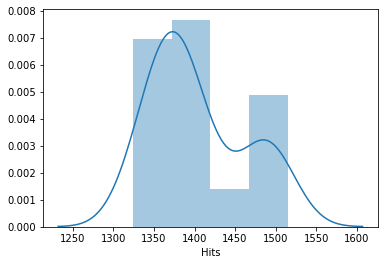

In [238]:
#Exploring the 'Hits' variable

sns.distplot(bb_data['Hits'])

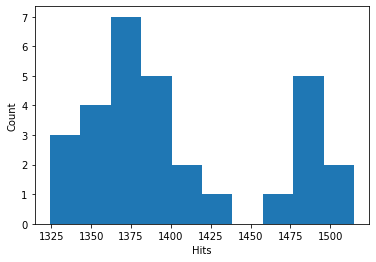

In [239]:
plt.hist(bb_data['Hits'])
plt.xlabel('Hits')
plt.ylabel('Count')
plt.show()

Observations for 'Hits' column -

- The data is not normally distributed but is a bit right skewed.
- The values around 1410 - 1440 are less
- There are no values between 1440 - 1455, adding a gap in the graph. But the distribution curve does not show a gap here, hence we can manage with this data.
- There is a sudden rise in values after 1475 - 1490.

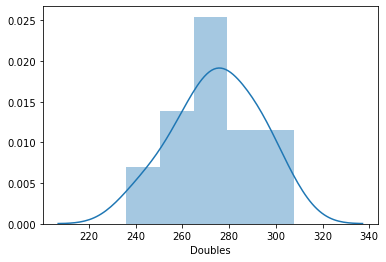

In [240]:
#Exploring the 'Doubles' variable

sns.distplot(bb_data['Doubles'])

Observations for the 'Doubles' variable -

- The data distribution is normal, but the spread is a bit higher, looking at the width of the graph.
- Majority of the values are falling in the range ~265 - 280

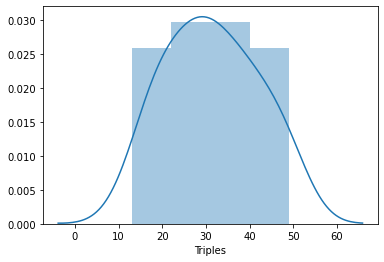

In [241]:
#Exploring the 'Triples' variable

sns.distplot(bb_data['Triples'])

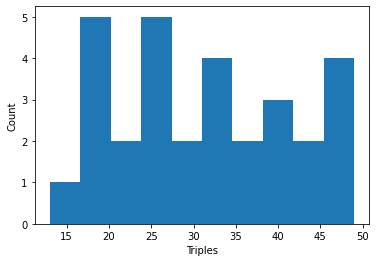

In [242]:
plt.hist(bb_data['Triples'])
plt.xlabel('Triples')
plt.ylabel('Count')
plt.show()

Observations for the 'Triples' variable -

- The values range between ~ 13 - 48
- Data is normally distributed.

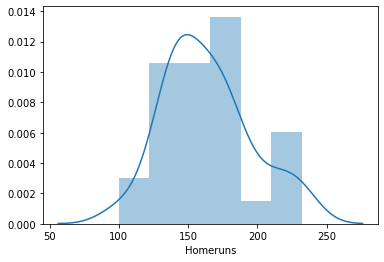

In [243]:
#Exploring the 'Homeruns' variable

sns.distplot(bb_data['Homeruns'])

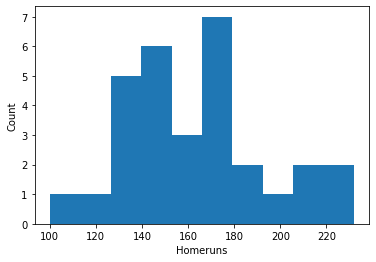

In [244]:
plt.hist(bb_data['Homeruns'])
plt.xlabel('Homeruns')
plt.ylabel('Count')
plt.show()

Observations for 'Homeruns' column -

- The data is slightly right skewed.
- There is a slight increase in Homeruns after ~205.
- Majority of the values lie between 125-180

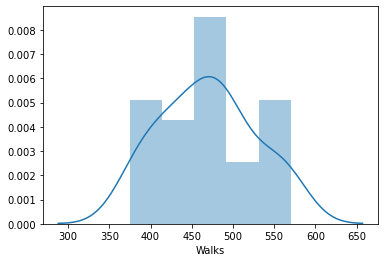

In [245]:
#Exploring the 'Walks' variable

sns.distplot(bb_data['Walks'])

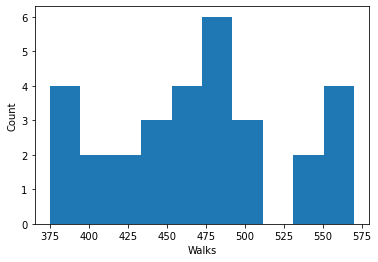

In [246]:
plt.hist(bb_data['Walks'])
plt.xlabel('Walks')
plt.ylabel('Count')
plt.show()

Observations for 'Walks' column -

- The walks are missing between 510 - 525
- After 525, we see some values, having significant count (6 in number, which is 20% of our dataset).
- The data is distributed normally, but the spread is high, checking at the width of the graph.

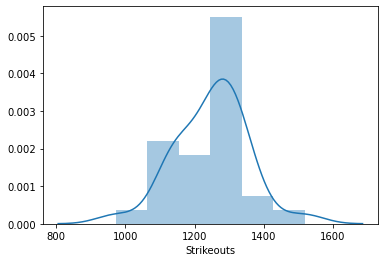

In [247]:
#Exploring the 'Strikeouts' variable

sns.distplot(bb_data['Strikeouts'])

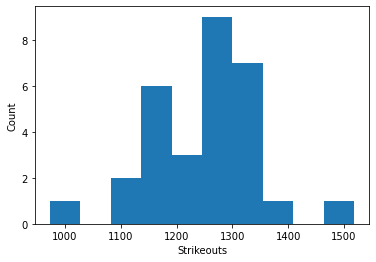

In [248]:
plt.hist(bb_data['Strikeouts'])
plt.xlabel('Strikeouts')
plt.ylabel('Count')
plt.show()

Observations from 'Strikeouts' column -

- There is one outlier value (after a gap) on both sides of the graph.
- Rest of the data seems to be normally distributed.
- Value between 1180 - 125 is less and is almost in the middle

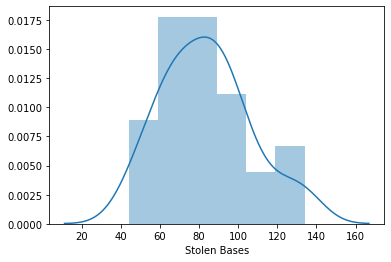

In [249]:
#Exploring the 'Stolen Bases' variable

sns.distplot(bb_data['Stolen Bases'])

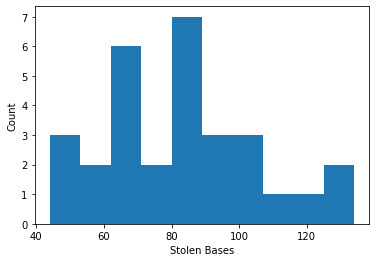

In [250]:
plt.hist(bb_data['Stolen Bases'])
plt.xlabel('Stolen Bases')
plt.ylabel('Count')
plt.show()

Observations from 'Stolen Bases' column -

- The data is normally distributed

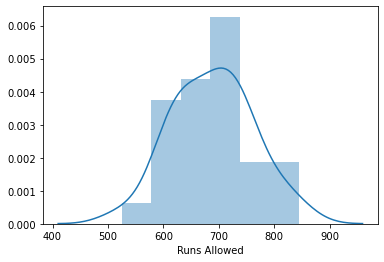

In [251]:
#Exploring the 'Runs Allowed' variable

sns.distplot(bb_data['Runs Allowed'])

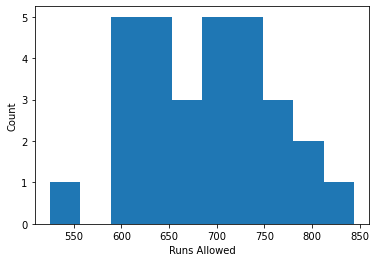

In [252]:
plt.hist(bb_data['Runs Allowed'])
plt.xlabel('Runs Allowed')
plt.ylabel('Count')
plt.show()

Observation for 'Runs Allowed' column -

- There is one outlier value present in Runs Allowed column, which is managing the skewness in the data, else the data seems to be right skewed.
- This value is impacting the normal distribution.
- Distribution in rest of the data is almost similar, having similar counts till 750, and decreasing thereafter.

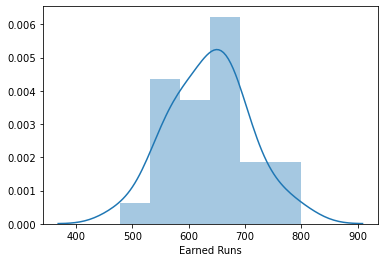

In [253]:
#Exploring the 'Earned Runs' variable

sns.distplot(bb_data['Earned Runs'])

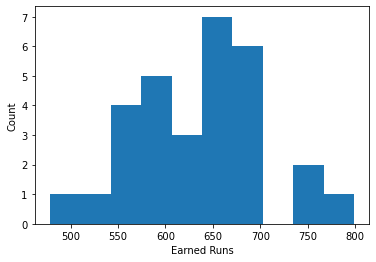

In [254]:
plt.hist(bb_data['Earned Runs'])
plt.xlabel('Earned Runs')
plt.ylabel('Count')
plt.show()

Observations in Earned Runs column-

- There are 3 values after a break in this column, the value falls after 740.
- These values seems to be impacting skewness of the datam which otherwise seem to be left skewed.
- Values between 450 - 550 are also less in count.

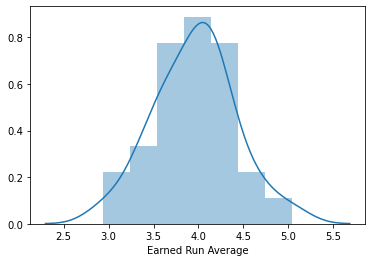

In [255]:
#Exploring the 'Earned Run Average' variable

sns.distplot(bb_data['Earned Run Average'])

Observations from the 'Earned Runs Average' column -

- The data is normally distributed as can be seen in the distribution curve. No outliers are observed.

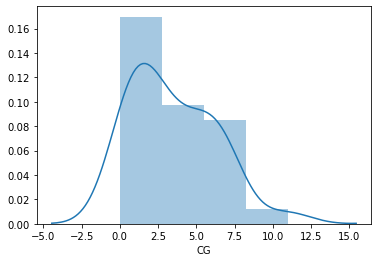

In [256]:
#Exploring the 'CG' variable

sns.distplot(bb_data['CG'])

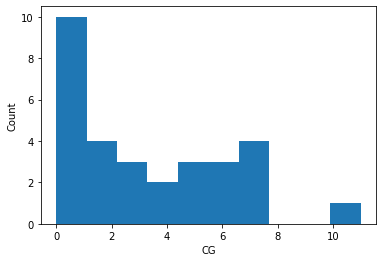

In [257]:
plt.hist(bb_data['CG'])
plt.xlabel('CG')
plt.ylabel('Count')
plt.show()

Observations in CG column -

CG column is the Complete Game column, which indicates how many games were there when the pitcher pitched an entire game, without the help of relief pitcher.

- Complete Games are highest set to 1, after which the numbers decrease significantly. The count immediately crashes to 4, when CG value is 2.
- There is one outlier in our set where the CG value is set to 10.
- The data in CG column is right skewed.

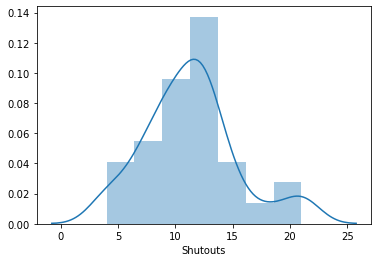

In [258]:
#Exploring the 'Shutouts' variable

sns.distplot(bb_data['Shutouts'])

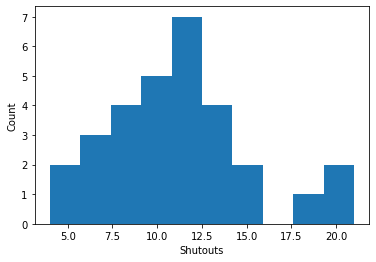

In [259]:
plt.hist(bb_data['Shutouts'])
plt.xlabel('Shutouts')
plt.ylabel('Count')
plt.show()

Observations in Shutouts column -

- the data is majorly falling between 4 - 16, but is slightly left skewed
- There are 3 values between 17.5 - 20, which is disturbing the distplot for the data. These values are present after a gap.

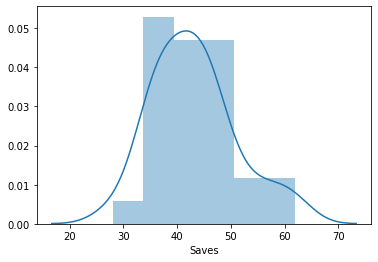

In [260]:
#Exploring the 'Saves' variable

sns.distplot(bb_data['Saves'])

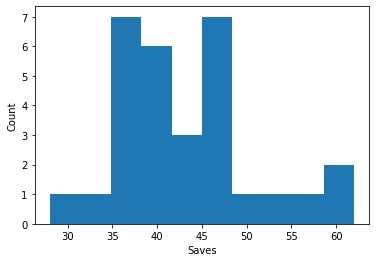

In [261]:
plt.hist(bb_data['Saves'])
plt.xlabel('Saves')
plt.ylabel('Count')
plt.show()

Observations from Saves column -

- The data majorly falls between 35 - 48.
- Data below 35 and above 48 are less in number, but in total have a significant count.
- The data is slightly right skewed.

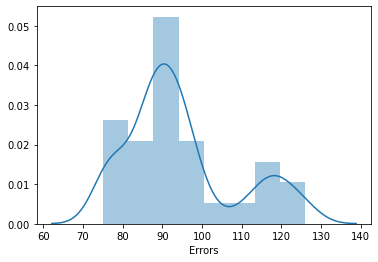

In [262]:
#Exploring the 'Errors' variable

sns.distplot(bb_data['Errors'])

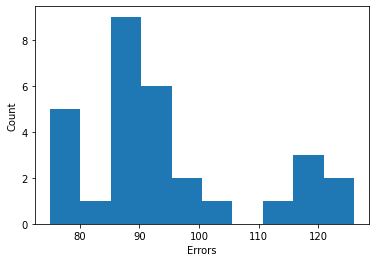

In [263]:
plt.hist(bb_data['Errors'])
plt.xlabel('Errors')
plt.ylabel('Count')
plt.show()

Observations from 'Errors' column -

- The data is right skewed
- Spread of data is not continuous.
- Majority of the values lie between 85 - 90

Let us now proceed to bivariate and multivariate analysis

In [264]:
corr = bb_data.corr()

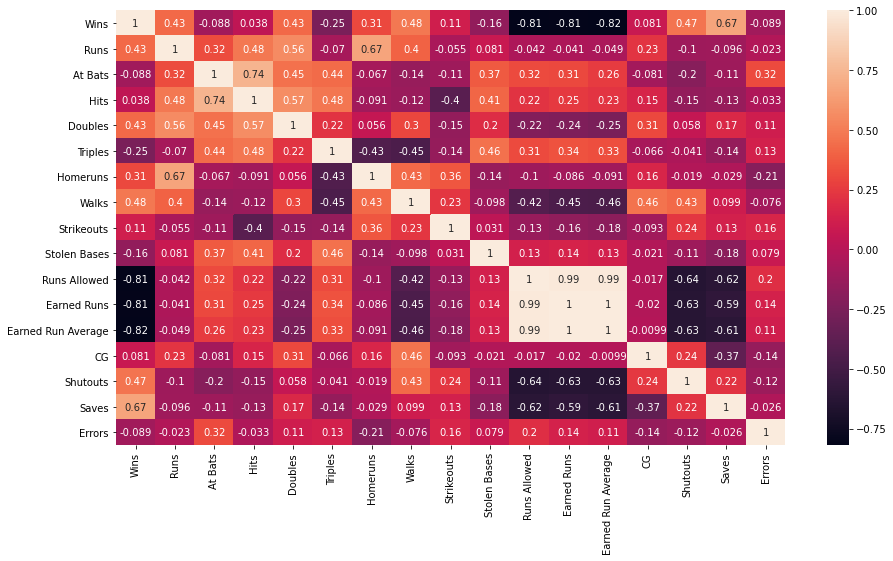

In [265]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True)
plt.show()

From the above heatmap, we identify that -

- Number of wins is highly dependent on Runs Allowed, Earned Runs and Earned Runs Average.
- Number of wins is impacted by the Runs, Doubles, Homeruns, Walks, Shutouts and Saves.

We also observe that our data contains multi-collinearity, which we will need to remove going further.

- Earned runs and Earned Runs average are in a fully linear relationship with correlation as 100%.
- Shutouts are highly negatively correlated with Runs allowed, Earned Runs and Earned Runs average.
- Saves are highly negatively correlated with Runs allowed, Earned Runs and Earned Runs average.
- Runs, Hits, At Bats, Doubles, Triples have high correlations among themselves.


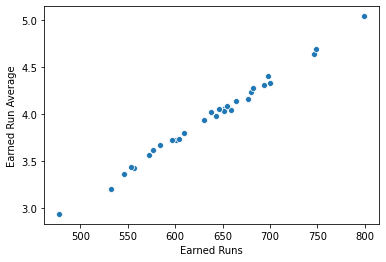

In [266]:
#Earned Runs and Earned runs average show linear relationship, plotting a scatterplot to confirm the assumption.

sns.scatterplot(x=bb_data['Earned Runs'], y=bb_data['Earned Run Average'])

The above graph confirms the presence of linear relationship among Earned Runs and Earned Runs Average feature.

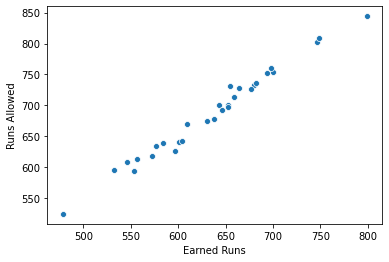

In [267]:
#Earned Runs and Runs Allowed show linear relationship, plotting a scatterplot to confirm the assumption.

sns.scatterplot(x=bb_data['Earned Runs'], y=bb_data['Runs Allowed'])

The above graph confirms the presence of linear relationship among Earned Runs and Runs allowed feature.

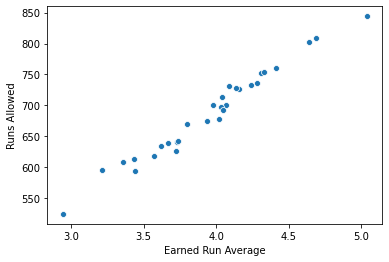

In [268]:
#Earned Run Average and Runs Allowed show linear relationship, plotting a scatterplot to confirm the assumption.

sns.scatterplot(x=bb_data['Earned Run Average'], y=bb_data['Runs Allowed'])

The above graph confirms the presence of linear relationship among Runs Allowed and Earned Runs Average feature.

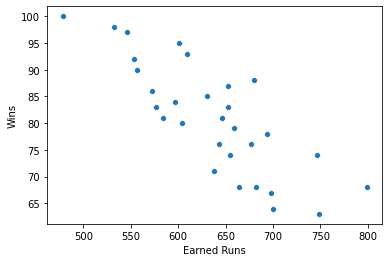

In [269]:
#Earned Runs and Wins show negative linear relationship, plotting a scatterplot to confirm the assumption.

sns.scatterplot(x=bb_data['Earned Runs'], y=bb_data['Wins'])

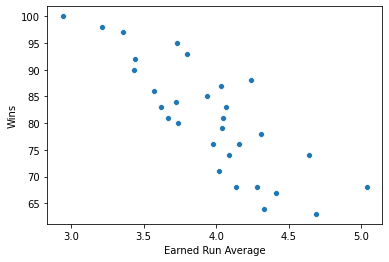

In [270]:
#Earned Run Average and Wins show negative linear relationship, plotting a scatterplot to confirm the assumption.

sns.scatterplot(x=bb_data['Earned Run Average'], y=bb_data['Wins'])

The above graph confirms the presence of negative linear relationship among Earned Run Average and Wins.

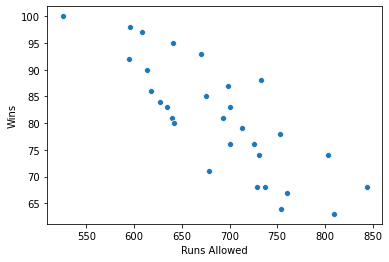

In [271]:
#Runs Allowed and Wins show negative linear relationship, plotting a scatterplot to confirm the assumption.

sns.scatterplot(x=bb_data['Runs Allowed'], y=bb_data['Wins'])

The above graph confirms the presence of negative linear relationship among Runs allowed and Wins

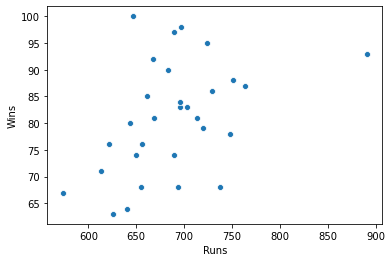

In [272]:
#Runs and Wins show relationship, plotting a scatterplot to confirm the assumption.

sns.scatterplot(x=bb_data['Runs'], y=bb_data['Wins'])

Data for runs in cluttered between 550 - 750, and shows one outlier value. The number of wins in not majorly impacted by this outlier values hence we can drop this row later to allow our data to learn more.

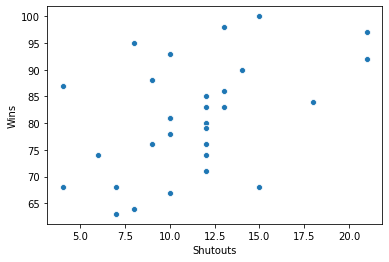

In [273]:
#Shutouts and Wins show relationship, plotting a scatterplot to confirm the assumption.

sns.scatterplot(x=bb_data['Shutouts'], y=bb_data['Wins'])

The data seems to be scattered, but the tendency to increase number of wins with the number of increasing shutouts can be observed.

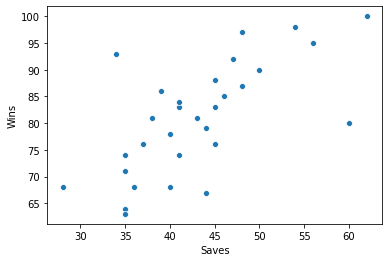

In [274]:
#Saves and Wins show relationship, plotting a scatterplot to confirm the assumption.

sns.scatterplot(x=bb_data['Saves'], y=bb_data['Wins'])

The above graph confirms the presence of a linear relationship between saves and wins.

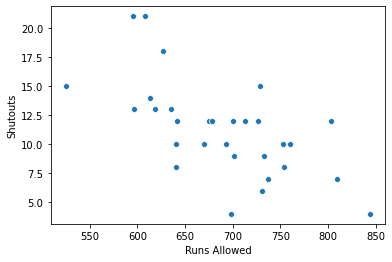

In [275]:
#Runs Allowed and Shutouts show negative relationship, plotting a scatterplot to confirm the assumption.

sns.scatterplot(x=bb_data['Runs Allowed'], y=bb_data['Shutouts'])

The above graph shows negative linear relationship, with decrease in shutouts, runs allowed increase.

Now since we are done with the major EDA and know how our data is related, we will proceed to model our data.

# Data modeling

Since we do not have any missing data, we can directly move to the outlier detection phase. We will be using zscore to find out the outliers.

# Outlier detection and removal

In [276]:
from scipy.stats import zscore

In [277]:
zs_values = zscore(bb_data)

In [278]:
zs_values

array([[ 1.36540860e+00,  6.19077968e-01,  8.47731264e-01,
         1.66368512e+00,  1.42017307e+00,  1.04119304e+00,
        -7.87298598e-01, -1.53490242e+00, -2.69762957e+00,
         9.13883291e-01, -6.66233927e-01, -5.05110079e-01,
        -5.06955186e-01, -5.39806195e-01, -8.14628593e-01,
         1.67160651e+00, -4.61469635e-01],
       [ 1.97838300e-01,  1.34431656e-01, -7.11093535e-01,
        -9.70680764e-01,  1.27403389e-01,  1.23580856e+00,
        -2.43966683e-01, -5.36591904e-01,  1.54878442e-01,
        -6.01825582e-01,  1.65970766e-01,  2.48929848e-01,
         2.54597523e-01, -5.39806195e-01,  1.72800005e-01,
         2.49879323e-01, -6.07196888e-01],
       [ 3.24325082e-03, -3.32905860e-01, -1.11523330e+00,
        -1.51891367e-01,  1.58879521e+00, -2.23807850e-01,
        -7.23377196e-01,  1.13914361e+00, -8.93981893e-01,
         1.11449182e-01, -6.80339091e-01, -7.51623132e-01,
        -6.41346840e-01,  2.77264091e+00, -3.20914294e-01,
        -6.54856158e-01, -1.1

In [279]:
bb_data[(abs(zs_values<3).all(axis=1))] #Gives result as 1 less row, as suspected, this row is the one with runs = 891

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [280]:
zs_values[5][1] #Printing the value of zscore for the column where we expected outlier

3.5096470447193067

In [281]:
#Removing the outlier

bb_data.drop(index = 5, axis = 0, inplace = True)

In [282]:
bb_data

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


We have successfully removed the outlier value from our data

# Skewness treatment

We will now check skewness present in the data

In [283]:
bb_data.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
CG                    0.854980
Shutouts              0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

Considering the threshold value as 0.5, following columns need to be treated for skewness

- Hits
- CG
- Shutouts
- Saves
- Errors


All of these columns are positively skewed, hence we will try to transform them.

We use boxcox transform for Shutouts, Saves and Errors. We cannot use boxcox for CG since it has 0 value.
Also, hit column is not working fine with boxcox transform as per a trial taken 

In [284]:
for i in ['Shutouts','Saves','Errors']:
    bb_data[i],fit_lambda = st.boxcox(bb_data[i])

In [285]:
bb_data.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
CG                    0.854980
Shutouts             -0.000201
Saves                -0.000857
Errors                0.065150
dtype: float64

We were successfully able to remove skewness from Errors, Shutouts and saves.

Trying cbrt transform on Hits and CG column

In [286]:
for i in ['Hits','CG']:
    bb_data[i] = np.cbrt(bb_data[i])

In [287]:
bb_data.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.753696
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
CG                   -1.013981
Shutouts             -0.000201
Saves                -0.000857
Errors                0.065150
dtype: float64

In [288]:
bb_data['Hits'] = np.cbrt(bb_data['Hits'])

In [289]:
bb_data.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.743531
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
CG                   -1.013981
Shutouts             -0.000201
Saves                -0.000857
Errors                0.065150
dtype: float64

In [290]:
bb_data['Hits'] = np.log(bb_data['Hits'])

In [291]:
bb_data.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.738423
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
CG                   -1.013981
Shutouts             -0.000201
Saves                -0.000857
Errors                0.065150
dtype: float64

In [292]:
bb_data['Hits'] = np.sqrt(bb_data['Hits'])

In [293]:
bb_data.skew()

Wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.735244
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
CG                   -1.013981
Shutouts             -0.000201
Saves                -0.000857
Errors                0.065150
dtype: float64

We were able to treat skewness from Errors column.

But the Hits column is not getting successfully transformed, after trying log/sqrt/cbrt transform.
The correlation of this column with Wins is also quite less (0.038), hence we decide to drop this column.

In [294]:
bb_data.drop('Hits',axis = 1, inplace=True)

In [295]:
bb_data

,Wins,Runs,At Bats,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,1.259921,3.974599,2.908497,0.546961
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,1.259921,5.459561,2.796661,0.546955
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,2.223980,4.749412,2.707279,0.546928
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,1.912931,4.371328,2.692943,0.546995
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,1.912931,5.459561,2.662860,0.546955
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,1.442250,2.108371,2.830102,0.546976
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,0.000000,4.749412,2.772881,0.546919
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,1.000000,5.459561,2.942919,0.546981
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,1.442250,4.749412,2.734669,0.546986
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,1.709976,4.371328,2.796661,0.547026


# Scaling the data

We will now scale the data using Standard scaler, which will help our model to learn better, using normalized values.

In [296]:
#Lets bring all features to a common scale using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [297]:
#Dividing the dataset into independent and dependent data before scaling

ds_x = bb_data.drop('Wins', axis = 'columns')
y = bb_data['Wins']

In [298]:
data = sc.fit_transform(ds_x)

x = pd.DataFrame(data,columns=ds_x.columns)

In [299]:
x

,Runs,At Bats,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.094672,-0.784786,1.532705,-0.348122
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.094672,0.236008,0.311820,-0.540670
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.615608,-0.252164,-0.663935,-1.326159
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.063794,-0.512066,-0.820436,0.650759
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.063794,0.236008,-1.148850,-0.540670
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.228786,-2.067671,0.676890,0.082938
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-2.329822,-0.252164,0.052223,-1.588383
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.555782,0.236008,1.908481,0.237637
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.228786,-0.252164,-0.364926,0.383394
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.703744,-0.512066,0.311820,1.554133


We have successfully completed the scaling of data and have got normalized values for our dataset.

# PCA - Principal Component Analysis

In [300]:
#Imprting PCA

from sklearn.decomposition import PCA

In [301]:
pca_result = PCA()

In [302]:
pca_result.fit(x)

PCA()

In [303]:
#Storing the explained variance ratio to check how much data loss is expected if we apply PCA

variance = pca_result.explained_variance_ratio_

In [304]:
variance

array([3.10192036e-01, 1.59949242e-01, 1.34130985e-01, 9.52073955e-02,
       7.60462216e-02, 7.17806008e-02, 4.02194261e-02, 3.52371482e-02,
       2.56102646e-02, 1.96733635e-02, 1.67242008e-02, 9.36215091e-03,
       5.53222546e-03, 3.14461003e-04, 2.02775638e-05])

In [305]:
#We will fit the data to 11 components and drop 4 columns, and check how our model performs.

In [306]:
pca = PCA(n_components=11)

In [307]:
#Transforming the data to given components

x = pca.fit_transform(x)

In [308]:
x

array([[ 3.24190818e-01, -1.93363711e+00, -2.63077247e+00,
         5.08259853e-01, -2.69812407e+00,  6.14962256e-02,
        -9.06036660e-01, -2.10672754e-01,  6.92765430e-01,
        -4.95218993e-01,  6.32776654e-01],
       [ 2.38953964e-01,  7.35885356e-02, -3.28018150e-01,
        -1.20948493e-01, -4.64388252e-01,  5.21524134e-01,
         7.16135487e-01, -1.33733953e+00,  6.80618971e-02,
        -1.56313493e-01, -5.49161827e-01],
       [-1.27576477e+00, -5.05438573e-01, -3.84130131e-01,
        -2.59248838e+00, -9.85067041e-01, -1.30069957e-02,
        -1.27965806e+00, -1.47219330e-01,  5.00525957e-02,
         1.39142172e+00, -4.92887141e-01],
       [ 9.74167852e-01,  1.33927329e+00, -5.23420579e-01,
        -6.61022194e-01,  3.68076201e-01, -1.19840868e+00,
         1.75112376e-01,  1.36782780e-01,  4.14162959e-01,
         5.55419079e-01,  1.13454932e+00],
       [ 2.91235777e+00, -1.32720318e+00,  2.55114221e-01,
        -1.49712616e+00,  9.64736351e-02,  4.99712051e-01,
  

# Fitting the data in Regression models

In [309]:
#Importing the ML models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [310]:
#Creating objects for the data models

dt = DecisionTreeRegressor()
svr = SVR(kernel = 'linear')
knn = KNeighborsRegressor()
lr = LinearRegression()

In [311]:
#Finding best random state, fitting models and checking for regression metrics

for k in range(101):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = k)
    for i in [dt, svr, knn, lr]:
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        test_score = r2_score(y_test, pred)
        train_score = r2_score(y_train,i.predict(x_train))
        if abs(train_score - test_score) <= 0.02:
            print(i)
            print('At random state ',k)
            print('R2 score is ',r2_score(y_test, pred))
            print('R2 for train data', r2_score(y_train,i.predict(x_train)))
            print('Mean absolute error is ',mean_absolute_error(y_test, pred))
            print('Mean squared error is ', mean_squared_error(y_test, pred))
            print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
            print('------------------------------------------')

KNeighborsRegressor()
At random state  4
R2 score is  0.6480538018116938
R2 for train data 0.6674421315182171
Mean absolute error is  4.333333333333333
Mean squared error is  31.657777777777767
Root mean squared error is  5.626524484775461
------------------------------------------
SVR(kernel='linear')
At random state  15
R2 score is  0.8778035761915954
R2 for train data 0.8623681218033434
Mean absolute error is  2.6596331765354315
Mean squared error is  16.39544115987335
Root mean squared error is  4.049128444477077
------------------------------------------
LinearRegression()
At random state  15
R2 score is  0.866223709388596
R2 for train data 0.8816461734973912
Mean absolute error is  3.276600029777187
Mean squared error is  17.949144769935028
Root mean squared error is  4.236643101552811
------------------------------------------
SVR(kernel='linear')
At random state  23
R2 score is  0.8921966692781874
R2 for train data 0.8860892716370454
Mean absolute error is  3.136781100783038
Me

From the above data, we identify that the linear is performing the best.

Metrics -
- At random state  90
- R2 score is  0.8990682766901296
- R2 for train data 0.9023759927875379
- Mean absolute error is  1.7337091225439738
- Mean squared error is  6.190479029672052

It gives us as R2 score of 90% on train data and 89% on test data.
The mean absolute error is also the lowest, and is valued as 1.73, which is a quite good score, considering our wins range mostly between 60 - 100. 
The mean squared error is also the lowest.

SVR also had a good score, but the mean absolute error and mean squared error were higher. 

Hence we will select Linear Regression at random state 90 out of the above mentioned regression models.

# Using the ensemble technique

In [312]:
#Importing the random forest regressor

from sklearn.ensemble import RandomForestRegressor

In [313]:
rfr = RandomForestRegressor()

In [314]:
#Finding the best random state, fitting the data and predicting scores

for k in range(101):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = k)
    rfr.fit(x_train, y_train)
    pred = rfr.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train,rfr.predict(x_train))
    if abs(train_score - test_score) <= 0.2:
        print('At random state ',k)
        print('R2 score for test data is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,rfr.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

At random state  1
R2 score for test data is  0.7493754575707154
R2 for train data 0.9348903954176928
Mean absolute error is  4.99888888888889
Mean squared error is  33.472300000000004
Root mean squared error is  5.785525040996712
------------------------------------------
At random state  4
R2 score for test data is  0.8142741421905022
R2 for train data 0.928024755821814
Mean absolute error is  3.1200000000000014
Mean squared error is  16.70615555555557
Root mean squared error is  4.087316424691826
------------------------------------------
At random state  24
R2 score for test data is  0.7999899534161492
R2 for train data 0.9178693264342774
Mean absolute error is  3.536666666666665
Mean squared error is  15.902033333333325
Root mean squared error is  3.9877353640046533
------------------------------------------
At random state  65
R2 score for test data is  0.7953168947124304
R2 for train data 0.9334944818829963
Mean absolute error is  4.138888888888889
Mean squared error is  21.7924

Regression metrics for Linear Regression model are much better than the Random forest Regressor, hence we proceed with Linear regression model as the best model.

# Cross validation 

We will now cross validate our score

In [315]:
#Importing cross val score from Model_selection

from sklearn.model_selection import cross_val_score

In [316]:
for i in range(2,9):
    cv = cross_val_score(lr, x, y, cv=i, scoring = 'r2')
    print('For cv {}, values are {}, mean is {}'.format(i,cv,cv.mean()))

For cv 2, values are [0.0501416  0.56848318], mean is 0.3093123912706804
For cv 3, values are [-0.1881632   0.65954379  0.90782382], mean is 0.45973480274915596
For cv 4, values are [-0.1715122  -0.03261092  0.77215769  0.9129823 ], mean is 0.3702542196201415
For cv 5, values are [ 0.30141724 -1.42221507  0.65275726  0.95274168  0.91144768], mean is 0.27922975632763125
For cv 6, values are [ 0.26456523 -2.0348269   0.43580661  0.7406225   0.94682804  0.79854145], mean is 0.1919228215350212
For cv 7, values are [ 0.26456523 -2.64482636  0.33269803  0.39533102  0.86896232  0.94793269
  0.79854145], mean is 0.13760062567222728
For cv 8, values are [ 0.25457038 -1.59934235  0.0070804   0.58344268  0.85714836  0.81323052
  0.99189646  0.68296506], mean is 0.3238739384206435


The best mean value for cross val scores here is 0.45 at cv = 3, which is quite low than our actual score. 
This score would have been better but one of the fold got a negative score (-1.4) which disturbed the mean value.
But there are certain scores on some folds giving ~95% accuracies as well.

Since our dataset is quite small (29 rows), we will proceed with our model, and check how it predicts on data provided for predictions.
But before that, let us try to train our data over regularization models.

# Regularization techniques

In [317]:
#Importing regularization models

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

ls = Lasso(alpha = 0.1)
rd = Ridge(alpha = 0.1)

In [318]:
#Predicting scores using regularization models

for k in range(101):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = k)
    for i in [ls,rd]:
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        test_score = r2_score(y_test, pred)
        train_score = r2_score(y_train,i.predict(x_train))
        if abs(train_score - test_score) <= 0.02:
            print(i)
            print('At random state ',k)
            print('R2 score for test data is ',r2_score(y_test, pred))
            print('R2 for train data', r2_score(y_train,i.predict(x_train)))
            print('Mean absolute error is ',mean_absolute_error(y_test, pred))
            print('Mean squared error is ', mean_squared_error(y_test, pred))
            print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
            print('------------------------------------------')

Lasso(alpha=0.1)
At random state  15
R2 score for test data is  0.882065197515893
R2 for train data 0.8800700719254267
Mean absolute error is  3.1161557680839342
Mean squared error is  15.823647325892283
Root mean squared error is  3.977894835951836
------------------------------------------
Ridge(alpha=0.1)
At random state  15
R2 score for test data is  0.866122441575536
R2 for train data 0.8816321961534576
Mean absolute error is  3.243574981046916
Mean squared error is  17.962732159963895
Root mean squared error is  4.238246354326739
------------------------------------------
Lasso(alpha=0.1)
At random state  44
R2 score for test data is  0.8884010025557001
R2 for train data 0.8785766893250755
Mean absolute error is  2.7216391128839583
Mean squared error is  12.325489273292682
Root mean squared error is  3.510767618811117
------------------------------------------
Lasso(alpha=0.1)
At random state  90
R2 score for test data is  0.8942899003278937
R2 for train data 0.9011529208294584
M

In [319]:
#Cross validating the Lasso and Ridge models

for i in range(2,9):
    cv = cross_val_score(ls, x, y, cv=i, scoring = 'r2')
    print('For cv {}, values are {}, mean is {}'.format(i,cv,cv.mean()))

For cv 2, values are [0.39141476 0.77144537], mean is 0.5814300638962517
For cv 3, values are [-0.11013073  0.6721913   0.90838691], mean is 0.49014915923127583
For cv 4, values are [-0.03590248  0.38300274  0.78069712  0.90903718], mean is 0.509208638412548
For cv 5, values are [ 0.37919658 -1.34582452  0.64415733  0.94144621  0.89588893], mean is 0.30297290624681555
For cv 6, values are [ 0.32478254 -1.71133312  0.55076238  0.75265104  0.95438315  0.75853091], mean is 0.27162948426282885
For cv 7, values are [ 0.32478254 -2.08624665  0.15018017  0.35723348  0.85588233  0.96382585
  0.75853091], mean is 0.18916980321698063
For cv 8, values are [ 0.359203   -1.16972399 -0.32838381  0.61850208  0.85105948  0.83119461
  0.99218138  0.63215947], mean is 0.3482740276461879


In [320]:
for i in range(2,9):
    cv = cross_val_score(rd, x, y, cv=i, scoring = 'r2')
    print('For cv {}, values are {}, mean is {}'.format(i,cv,cv.mean()))

For cv 2, values are [0.23214248 0.70422296], mean is 0.468182721520357
For cv 3, values are [-0.17487681  0.66430159  0.91097885], mean is 0.4668012117926503
For cv 4, values are [-0.13939064  0.0251896   0.77439551  0.91665614], mean is 0.394212653458598
For cv 5, values are [ 0.31532726 -1.41164405  0.65536428  0.9530312   0.91287595], mean is 0.2849909267435608
For cv 6, values are [ 0.27730887 -2.00505334  0.45283522  0.74242812  0.94806617  0.80054933], mean is 0.2026890616272459
For cv 7, values are [ 0.27730887 -2.59705975  0.32154698  0.3974266   0.86752958  0.94951579
  0.80054933], mean is 0.14525962687317712
For cv 8, values are [ 0.26948971 -1.56890819 -0.01062549  0.59093352  0.85640056  0.81634827
  0.99243194  0.68580587], mean is 0.3289845243673369


We obtain the best results at random state 90 for both the models -

- Lasso(alpha=0.001)
- At random state  90
- R2 score is  0.8990530880698223
- R2 for train data 0.9023758439889075
- Mean absolute error is  1.7343342751773951
- Mean squared error is  6.19141059838423



- Ridge(alpha=0.001)
- At random state  90
- R2 score is  0.899067349679416
- R2 for train data 0.9023759914433596
- Mean absolute error is  1.7336763724834552
- Mean squared error is  6.190535886329149

These results are very similar to the Linear Regression model that we had selected. Proceeding with the Lasso Regression model to hypertune it since these models tend to avoid overfitting and cross val score for Lasso model is better.

# Hypertuning the best model

We will now try to find the best parameters for the model using GridSearch CV

In [321]:
from sklearn.model_selection import GridSearchCV

In [322]:
ls.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [323]:
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'alpha' : [0.00001,0.0001,0.001,0.1], 'copy_X':[True,False], 'random_state':list(range(30,91))}

gcv_ls = GridSearchCV(ls,param_grid, cv=2)

In [324]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 90)

In [325]:
#Fitting the model

res = gcv_ls.fit(x_train,y_train)

In [326]:
#Checking best params

res.best_params_

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': True,
 'random_state': 30}

In [327]:
#Creating model instance with best params

model = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1,normalize=True, random_state=30)

In [328]:
#Fitting the final model

model.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=1, normalize=True, random_state=30)

In [329]:
#Prediction using the final model

pred = model.predict(x_test)

In [330]:
print('R2 score for test data is ',r2_score(y_test, pred))
print('R2 for train data', r2_score(y_train,ls.predict(x_train)))
print('Mean absolute error is ',mean_absolute_error(y_test, pred))
print('Mean squared error is ', mean_squared_error(y_test, pred))
print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))

R2 score for test data is  0.8675688893462399
R2 for train data 0.831651880439077
Mean absolute error is  2.283525377568845
Mean squared error is  8.122441453430618
Root mean squared error is  2.8499897286535294


# Saving the best model

In [331]:
import joblib

joblib.dump(model, 'baseball.obj')

['baseball.obj']

# Conclusion

In [332]:
#Loading the saved model

model_test = joblib.load('baseball.obj')

In [333]:
#Prediction using saved model

output = model_test.predict(x_test)

In [334]:
#Creating a dataframe with actual and predicted values

wins = pd.DataFrame({'Actual':y_test,'Predicted':output})

In [335]:
#Print the result

wins

,Actual,Predicted
18,68,73.423013
24,63,64.288222
26,84,86.273773
2,81,82.559053
1,83,82.701884
13,76,78.802526
27,79,83.959017
7,81,80.041117
20,90,90.989126


We have created a model above, which predicts the Win score to ~86% accuracy. The absolute error is around 2, which is quite good as compared to our output values, the data will be predict 2-3 above/less than the actual outcome.

The data set is very small due to which we observe overfitting in various models.

We used the Lasso Regression model as the final model, since it avoids overfitting and gave us quite good results.